In [2]:
!pip install Korpora pandas matplotlib seaborn transformers

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Korpora import Korpora
from transformers import AutoTokenizer
import os

# 시각화 스타일 설정
sns.set(style="whitegrid")

# 한글 폰트 설정 (OS에 맞게 설정 필요)
import platform
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [11]:
import os
import requests

# 1. 다운로드 설정
# 현재 작업 경로 (ipynb 파일이 있는 위치)
current_dir = os.getcwd()

# KorQuAD v1.0 공식 다운로드 링크
files_to_download = {
    "KorQuAD_v1.0_train.json": "https://korquad.github.io/dataset/KorQuAD_v1.0_train.json",
    "KorQuAD_v1.0_dev.json":   "https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json"
}

print(f"📂 다운로드 경로: {current_dir}\n")

# 2. 다운로드 실행 반복문
for file_name, url in files_to_download.items():
    file_path = os.path.join(current_dir, file_name)
    
    # 이미 파일이 있다면 건너뛰기
    if os.path.exists(file_path):
        print(f"✅ 이미 존재합니다: {file_name}")
        continue
    
    print(f"⬇️ 다운로드 시작: {file_name} ...")
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status() # 에러 체크
        
        # 파일 쓰기
        with open(file_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192): 
                f.write(chunk)
        print(f"✅ 다운로드 완료: {file_name}")
        
    except Exception as e:
        print(f"❌ 다운로드 실패 ({file_name}): {e}")

print("\n🎉 모든 작업이 완료되었습니다.")

📂 다운로드 경로: c:\Users\SeungWoo\OneDrive\Desktop\Devprojects\practice\AI\DGU_MLLAB\Detection\KORdataset_1229

⬇️ 다운로드 시작: KorQuAD_v1.0_train.json ...
✅ 다운로드 완료: KorQuAD_v1.0_train.json
⬇️ 다운로드 시작: KorQuAD_v1.0_dev.json ...
✅ 다운로드 완료: KorQuAD_v1.0_dev.json

🎉 모든 작업이 완료되었습니다.


In [10]:
# ------------------------------------------------------------------
# Option A: Korpora 라이브러리로 데이터 바로 다운로드 (예: NSMC)
# ------------------------------------------------------------------
corpus_name = "namuwikitext" 
Korpora.fetch(corpus_name) # 데이터 다운로드
dataset = Korpora.load(corpus_name)

# 학습 데이터(train)를 Pandas DataFrame으로 변환
df = pd.DataFrame(dataset.train.texts, columns=['text'])
df['label'] = dataset.train.labels # 라벨이 필요한 경우

# ------------------------------------------------------------------
# Option B: 로컬에 있는 CSV 파일 불러오기 (가지고 있는 파일이 있다면 주석 해제 후 사용)
# ------------------------------------------------------------------
# file_path = "your_dataset.csv"  # 파일 경로 수정 필요
# df = pd.read_csv(file_path)
# 만약 텍스트 컬럼명이 'document'나 다른 이름이라면 'text'로 통일하거나 코드를 수정해야 합니다.
# df.rename(columns={'document': 'text'}, inplace=True) 

print(f"Dataset Shape: {df.shape}")

[namuwikitext] download namuwikitext_20200302.train.zip: 1.78GB [01:24, 21.1MB/s]                            


unzip C:\Users\SeungWoo\Korpora\namuwikitext\namuwikitext_20200302.train


[namuwikitext] download namuwikitext_20200302.test.zip: 9.14MB [00:00, 19.2MB/s]                            


unzip C:\Users\SeungWoo\Korpora\namuwikitext\namuwikitext_20200302.test


[namuwikitext] download namuwikitext_20200302.dev.zip: 8.71MB [00:00, 18.5MB/s]                            


unzip C:\Users\SeungWoo\Korpora\namuwikitext\namuwikitext_20200302.dev

    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Author : Hyunjoong Kim lovit@github
    Repository : https://github.com/lovit/namuwikitext
    References :

    나무위키의 덤프 데이터를 바탕을 제작한 wikitext 형식의 텍스트 파일입니다.
    학습 및 평가를 위하여 위키페이지 별로 train (99%), dev (0.5%), test (0.5%) 로 나뉘어져있습니다.


    # License
    CC BY-NC-SA 2.0 KR which Namuwiki dump dataset is licensed

[Korpora] Corpus `namuwikitext` is already installed at C:\Users\SeungWoo\Korpora\namuwikitext\namuwikitext_20200302.train.zip
[Korpora] Corpus `namuwikitext` is already installed at C:\Users\SeungWoo\Korpora\namuwikitext\namuwikitext_20200302.train
[Korpora] Corpus `namuwikitext` is already installed at C:\Users\SeungWoo\Korpora\namuwikitext\namuw

AttributeError: 'SentencePairKorpusData' object has no attribute 'labels'

In [6]:
# 1. 데이터셋의 첫 번째 10개 Row 확인 (Column 확인용)
print("### 1. First 10 Rows of DataFrame ###")
display(df.head(10))

# 2. 텍스트 자체로만 10개 출력
print("\n### 2. First 10 Raw Texts ###")
for i, text in enumerate(df['text'].head(10)):
    print(f"[{i+1}] {text}")

### 1. First 10 Rows of DataFrame ###


,text,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,원작의 긴장감을 제대로 살려내지못했다.,0
7,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,액션이 없는데도 재미 있는 몇안되는 영화,1
9,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1



### 2. First 10 Raw Texts ###
[1] 아 더빙.. 진짜 짜증나네요 목소리
[2] 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
[3] 너무재밓었다그래서보는것을추천한다
[4] 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
[5] 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
[6] 막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
[7] 원작의 긴장감을 제대로 살려내지못했다.
[8] 별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네
[9] 액션이 없는데도 재미 있는 몇안되는 영화
[10] 왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?


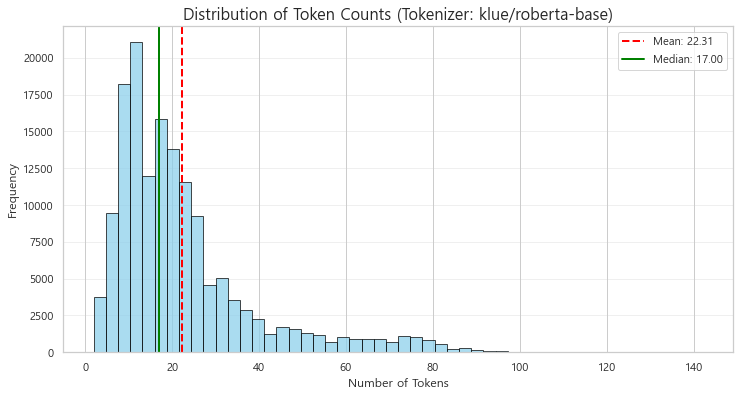


### Token Count Statistics ###
count    150000.000000
mean         22.309553
std          16.752178
min           2.000000
25%          11.000000
50%          17.000000
75%          27.000000
max         142.000000
Name: token_count, dtype: float64


In [8]:
import matplotlib.pyplot as plt

# --- 시각화 (Matplotlib 버전) ---
plt.figure(figsize=(12, 6))

# 히스토그램 그리기 (Seaborn 대신 plt.hist 사용)
# bins: 막대 개수, alpha: 투명도, edgecolor: 막대 테두리 색
plt.hist(df['token_count'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# 평균 및 중앙값 계산
mean_val = df['token_count'].mean()
median_val = df['token_count'].median()

# 평균 및 중앙값 라인 추가
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

# 그래프 설정
plt.title(f'Distribution of Token Counts (Tokenizer: {model_name})', fontsize=16)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, axis='y') # y축 기준 그리드

plt.show()

# 통계 요약 정보 출력
print("\n### Token Count Statistics ###")
print(df['token_count'].describe())